## Task 02 ##

Perform data cleaning and exploratory data anlysis(EDA) on a dataset of your choice,such as the Titanic dataset from kaggle. Explore the relationship between variables and identify patterns and trends in the data.


## Objective

The aim of this project is to perform a comprehensive Exploratory Data Analysis (EDA) on the Titanic dataset using Python.
This dataset contains information about passengers aboard the RMS Titanic, including features like age, gender, ticket class, and survival status.

Through EDA, I intend to:

Understand the structure and distribution of the dataset.

Identify patterns related to passenger survival.

Detect and handle missing values or outliers.

Visualize key relationships between features.

###  Dataset Description


The dataset includes the following columns:

Column	Description

PassengerId	Unique identifier for each passenger

Survived	Survival (0 = No, 1 = Yes)

Pclass	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Name	Passenger’s full name

Sex	Gender

Age	Age in years

SibSp	# of siblings/spouses aboard

Parch	# of parents/children aboard

Ticket	Ticket number

Fare	Passenger fare

Embarked	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### EDA Steps Performed

Importing libraries and loading the dataset

Initial inspection – shape, data types, preview

Statistical summary – using .describe() and .info()

Handling missing values – detecting and imputing/removing

Univariate analysis – histograms, value counts

Bivariate analysis – survival by gender, class, age, etc.

Correlation heatmap – for numerical features

Outlier detection and treatment – using boxplots/IQR

Conclusions and insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (418, 11)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Data Cleaning

In [9]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

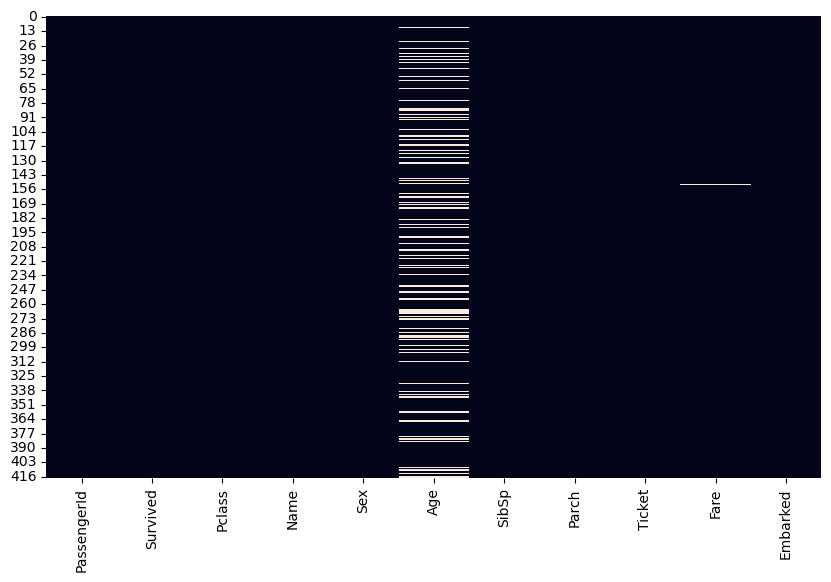

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [13]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [15]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

### Univariate Analysis

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Survival Count(0=No, 1=Yes) ')

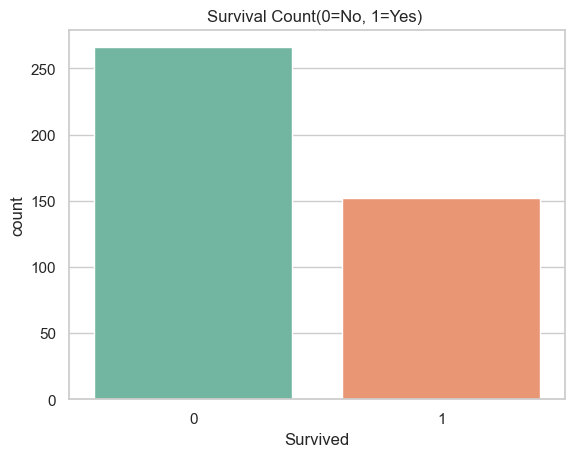

In [98]:
# Survival count
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count(0=No, 1=Yes) ')


Text(0.5, 1.0, 'Gender Distribution')

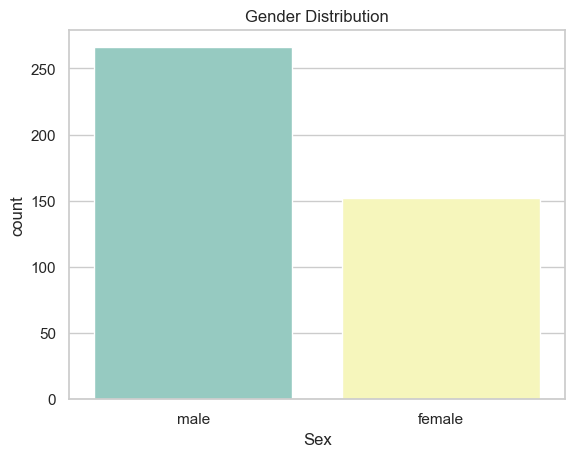

In [89]:
# Gender distribution
sns.countplot(x='Sex', data=df, palette='Set3')
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Passenger Class Distribution')

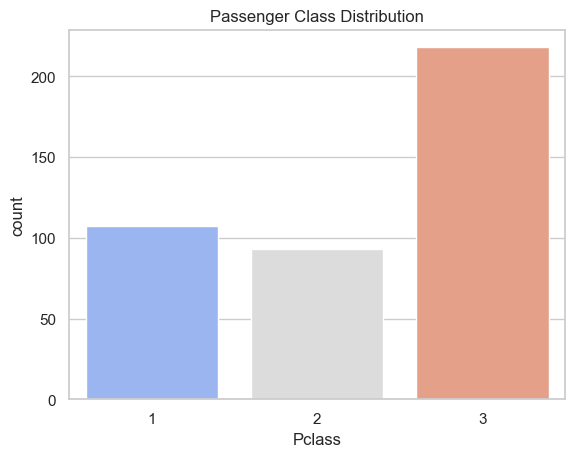

In [96]:
#Passenger Class Distribution
sns.countplot(x='Pclass',data=df,palette='coolwarm')
plt.title('Passenger Class Distribution')

Text(0.5, 1.0, 'Age Distribution')

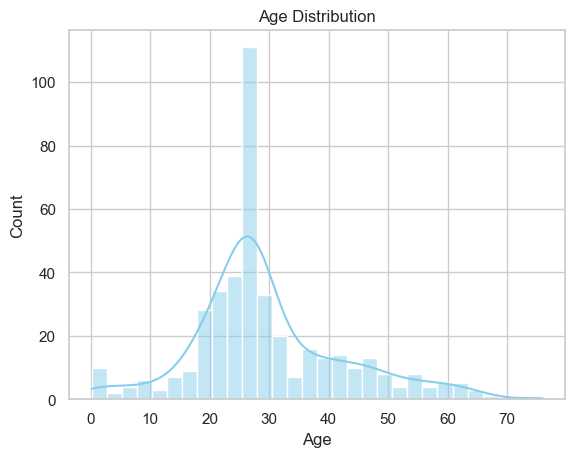

In [116]:
#Age Distribution
sns.histplot(df['Age'],kde=True,bins=30,color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

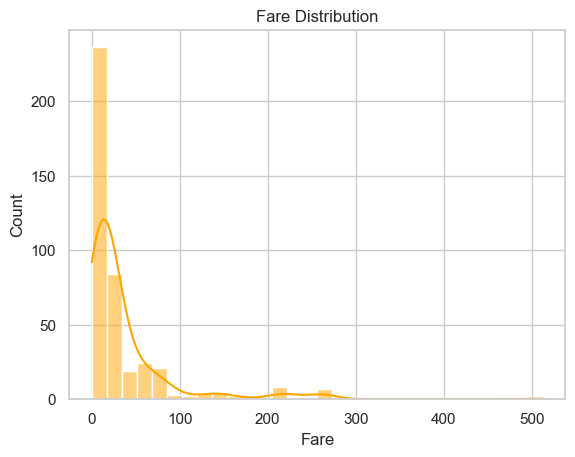

In [118]:
#Fare distribution
sns.histplot(df['Fare'], kde=True, bins=30, color='orange')
plt.title('Fare Distribution')

Text(0.5, 1.0, 'Port of Embarkation')

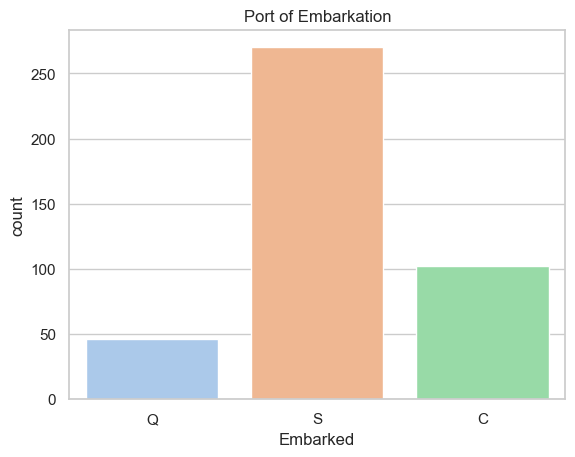

In [120]:
#Embarked distribution
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title('Port of Embarkation')

### Bivariate Analysis

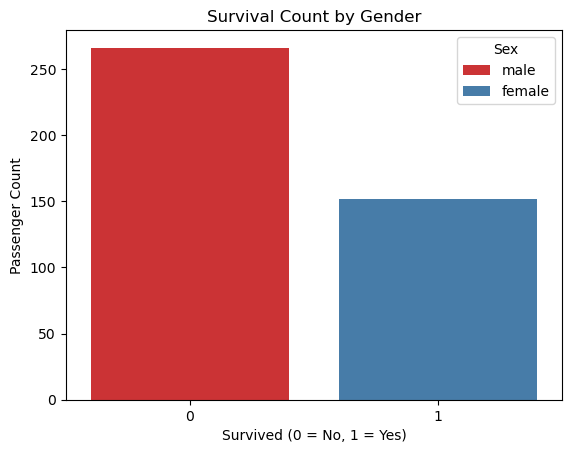

In [17]:
# Survival by Gender

sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

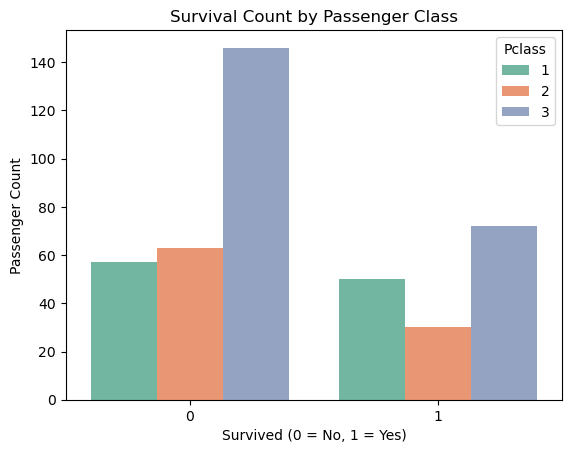

In [21]:
# Survival by Passenger Class

sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

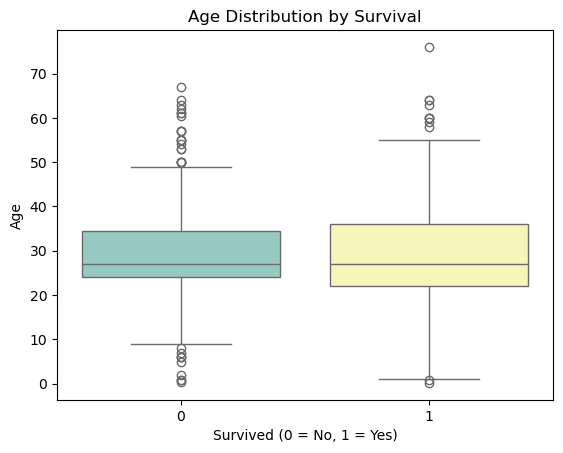

In [23]:
# Age vs. Survival (Box Plot)

sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

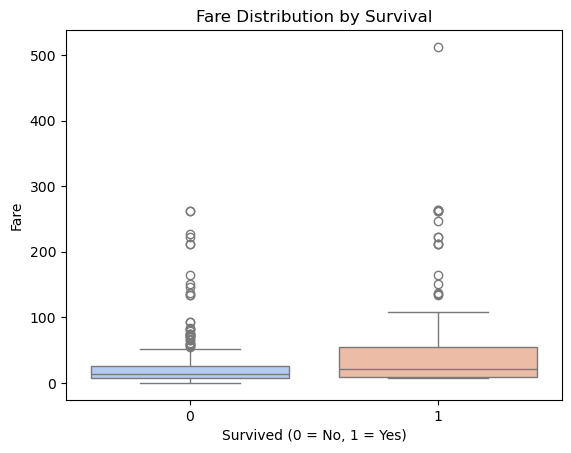

In [27]:
# Fare vs. Survival (Box Plot)

sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


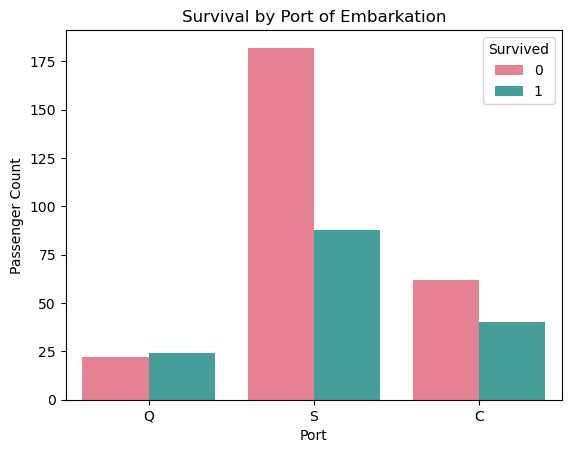

In [29]:
# Survival by Embarkation Port

sns.countplot(x='Embarked', hue='Survived', data=df, palette='husl')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Passenger Count')
plt.show()

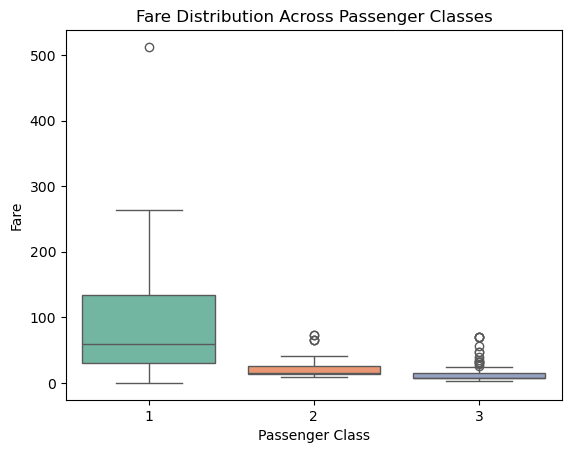

In [33]:
# Pclass v/s Fare
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Fare Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

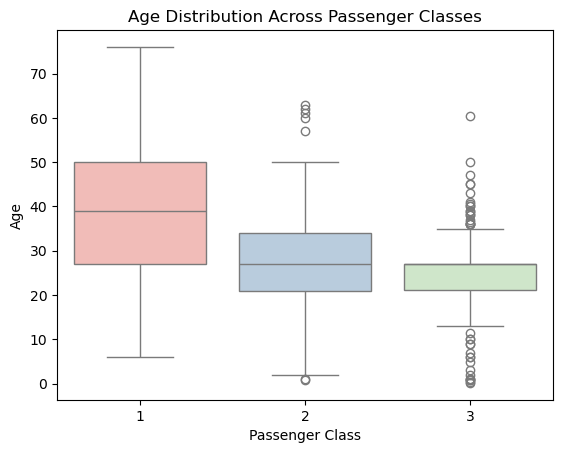

In [37]:
# Age v/s Pclass
sns.boxplot(data=df, x='Pclass', y='Age', palette='Pastel1')
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

## Correlation Heatmap

In [96]:
numerical_cols = ['Survived','Pclass','Age', 'Fare', 'SibSp', 'Parch']

In [98]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [100]:
corr_matrix = df[numerical_cols].corr()

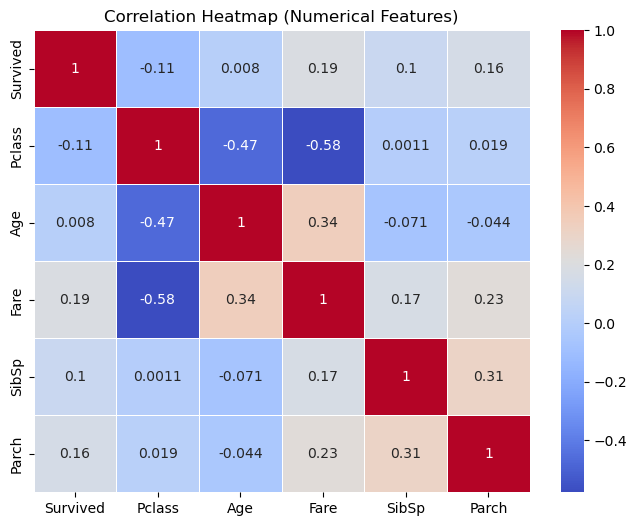

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

### Outlier Dtecetion & Treatment

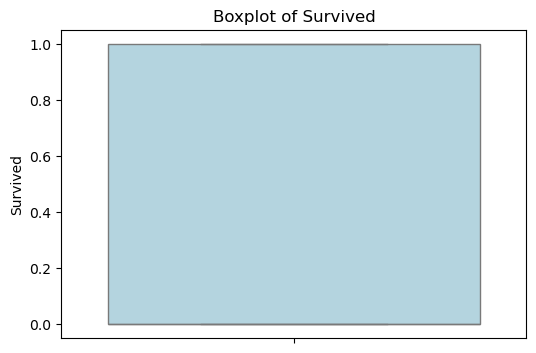

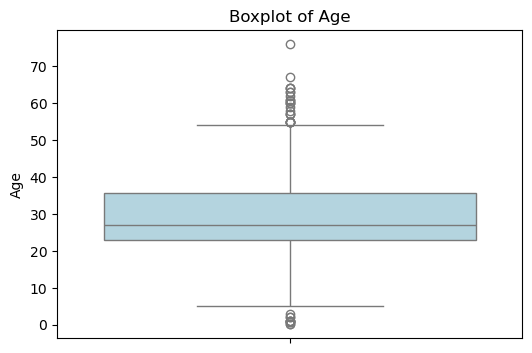

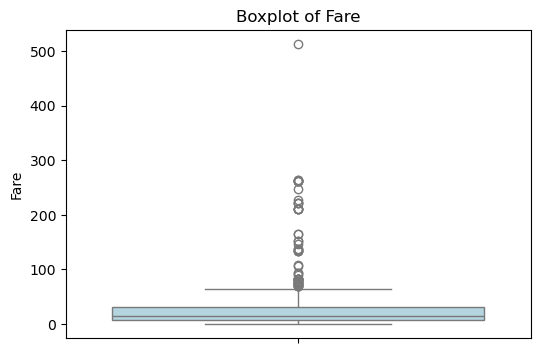

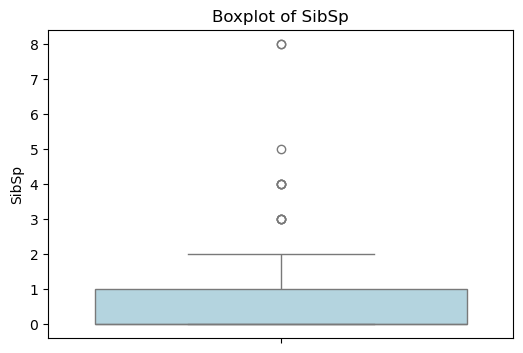

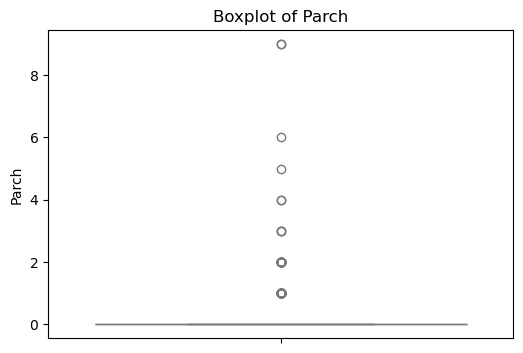

In [105]:
features = ['Survived','Age', 'Fare', 'SibSp', 'Parch']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=feature, color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [107]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter dataframe for rows within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df



In [109]:
# Apply for 'Age' and 'Fare' (continuous variables)
df_no_outliers = df.copy()

for col in ['Age', 'Fare']:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

print(f"Original data size: {df.shape[0]}")
print(f"Data size after removing outliers: {df_no_outliers.shape[0]}")

Original data size: 418
Data size after removing outliers: 333


Outlier detection was performed using boxplots and the IQR method. Significant outliers were observed in the Fare and Age features.
These outliers were removed to prevent skewing model performance and ensure robust analysis. The dataset size decreased from 418 to 333 rows after outlier removal.



### Final Conclusions & Insights from Titanic EDA

1. Passenger Class & Fare:

  > Passengers in higher classes (1st and 2nd) generally paid significantly higher fares.

  > Fare distribution in 3rd class showed more variation and included lower-priced tickets.

2. Age Distribution Across Classes:

  > Older passengers tended to travel in 1st class.

  > 3rd class had a wider range of younger passengers, including children and young adults.

3. Family Size (SibSp & Parch):

> Moderate positive correlation between siblings/spouses aboard and parents/children aboard indicates family travel.

> Many passengers traveled alone, but some traveled with large families.



4.Correlation Summary:

>Most numerical features were weakly correlated with each other, except for SibSp and Parch which showed moderate correlation.

>This suggests features offer mostly independent information, useful for predictive modeling.

5.Outlier Treatment:

>Significant outliers detected in Fare and Age via boxplots and IQR method.

>These outliers were removed to reduce data skew and improve model robustness.

>Discrete family size features (SibSp, Parch) were retained as-is.